In [1]:
import pandas as pd
import numpy as np

In [31]:
import yfinance as yf

# Download HBL (Habib Bank Limited) stock data from PSX using yfinance
hbl = yf.download('HBL.KA', start='2020-01-01', end='2024-01-01')

# Store in a pandas DataFrame
df_hbl = hbl
df_hbl.head()

C:\Users\qasim\AppData\Local\Temp\ipykernel_24764\3051387472.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hbl = yf.download('HBL.KA', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HBL.KA,HBL.KA,HBL.KA,HBL.KA,HBL.KA
Date,,,,,
2020-01-01,106.060951,106.894231,103.346282,103.509032,675200
2020-01-02,109.433121,110.012510,106.829120,107.415016,3173800
2020-01-03,106.308350,114.901551,104.583193,110.344549,7295200
2020-01-06,104.960762,106.432029,104.147012,104.518087,1191100
2020-01-07,108.671471,109.335494,103.216095,103.216095,1429600


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2020-01-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, HBL.KA)   1043 non-null   float64
 1   (High, HBL.KA)    1043 non-null   float64
 2   (Low, HBL.KA)     1043 non-null   float64
 3   (Open, HBL.KA)    1043 non-null   float64
 4   (Volume, HBL.KA)  1043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9 KB

Summary Statistics:
Price         Close         High          Low         Open        Volume
Ticker       HBL.KA       HBL.KA       HBL.KA       HBL.KA        HBL.KA
count   1043.000000  1043.000000  1043.000000  1043.000000  1.043000e+03
mean      77.898677    79.019503    76.971443    78.109732  1.857388e+06
std       14.342959    14.525919    14.178758    14.342517  2.478390e+06
min       47.244179    48.884169    46.715916    47.575336  0.000000e+00
25%       65.531113  

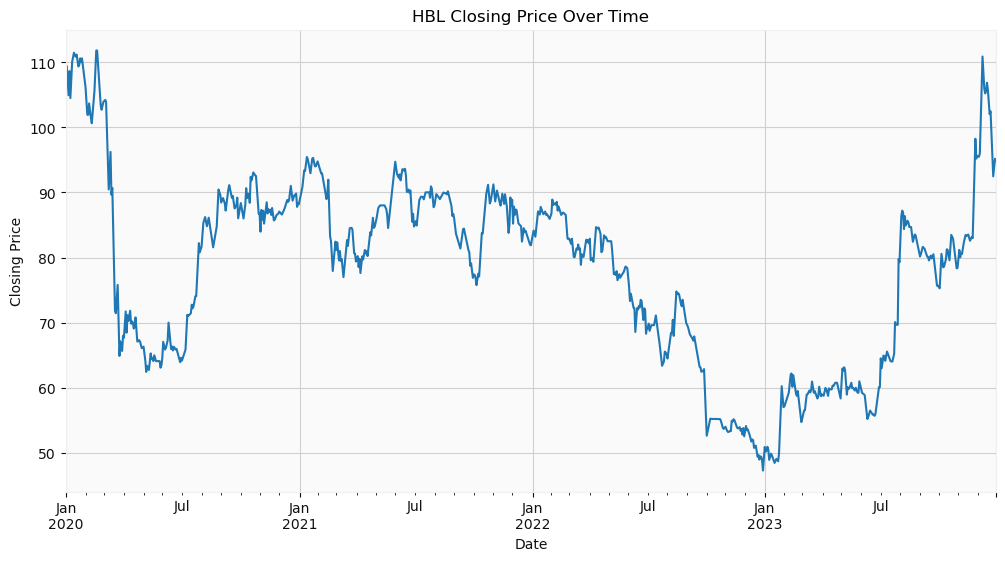

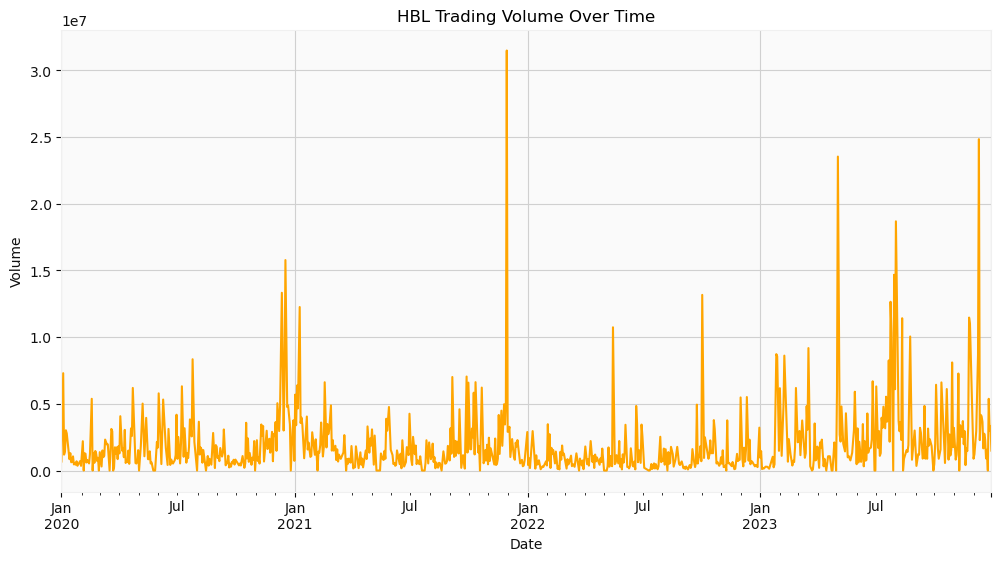


Correlation Matrix:
Price             Close      High       Low      Open    Volume
Ticker           HBL.KA    HBL.KA    HBL.KA    HBL.KA    HBL.KA
Price  Ticker                                                  
Close  HBL.KA  1.000000  0.997888  0.997655  0.995505  0.054098
High   HBL.KA  0.997888  1.000000  0.995731  0.996986  0.069660
Low    HBL.KA  0.997655  0.995731  1.000000  0.997200  0.031037
Open   HBL.KA  0.995505  0.996986  0.997200  1.000000  0.039842
Volume HBL.KA  0.054098  0.069660  0.031037  0.039842  1.000000


In [21]:
# Display basic information
print("DataFrame Info:")
df_hbl.info()
print("\nSummary Statistics:")
print(df_hbl.describe())

# Check for missing values
print("\nMissing Values:")
print(df_hbl.isnull().sum())

# Display first and last few rows
print("\nFirst 5 rows:")
print(df_hbl.head())
print("\nLast 5 rows:")
print(df_hbl.tail())

# Plot closing price over time
import matplotlib.pyplot as plt

df_hbl[('Close', 'HBL.KA')].plot(title='HBL Closing Price Over Time', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot volume over time
df_hbl[('Volume', 'HBL.KA')].plot(title='HBL Trading Volume Over Time', figsize=(12, 6), color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
print(df_hbl.corr())

In [22]:
import mplfinance as mpf

# Detect anomalies: Look for unusually high/low prices or volumes
z_scores = (df_hbl[('Close', 'HBL.KA')] - df_hbl[('Close', 'HBL.KA')].mean()) / df_hbl[('Close', 'HBL.KA')].std()
anomalies = df_hbl[np.abs(z_scores) > 3]
print("Anomalies in Closing Price (z-score > 3):")
print(anomalies)


Anomalies in Closing Price (z-score > 3):
Empty DataFrame
Columns: [(Close, HBL.KA), (High, HBL.KA), (Low, HBL.KA), (Open, HBL.KA), (Volume, HBL.KA)]
Index: []


Available years: [2020, 2021, 2022, 2023]
Available quarters:
1: Q1 (Jan-Mar)
2: Q2 (Apr-Jun)
3: Q3 (Jul-Sep)
4: Q4 (Oct-Dec)


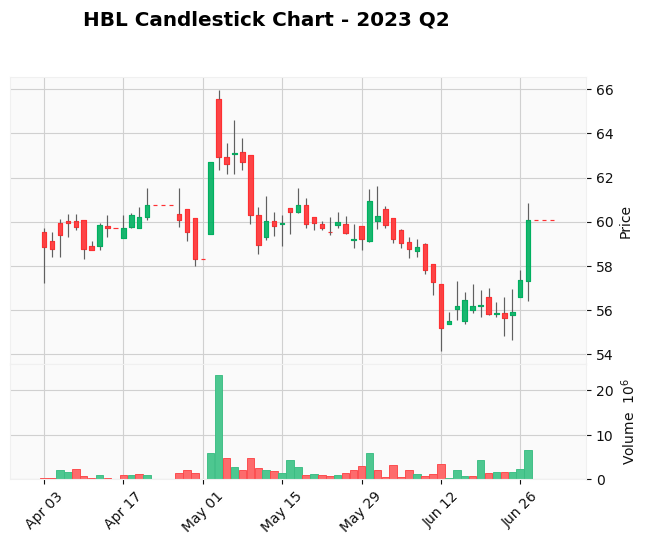

In [23]:
# Ensure all columns in df_candle are numeric
df_candle = df_candle.apply(pd.to_numeric, errors='coerce')

# Ask user for year and quarter
years = df_candle.index.year.unique()
print(f"Available years: {sorted(years)}")
year = int(input("Enter the year you want to plot (e.g., 2022): "))

quarters = {1: 'Q1 (Jan-Mar)', 2: 'Q2 (Apr-Jun)', 3: 'Q3 (Jul-Sep)', 4: 'Q4 (Oct-Dec)'}
print("Available quarters:")
for q, label in quarters.items():
    print(f"{q}: {label}")
quarter = int(input("Enter the quarter you want to plot (1-4): "))

# Filter data for selected year and quarter
quarter_months = {
    1: (1, 3),
    2: (4, 6),
    3: (7, 9),
    4: (10, 12)
}
start_month, end_month = quarter_months[quarter]
mask = (df_candle.index.year == year) & (df_candle.index.month >= start_month) & (df_candle.index.month <= end_month)
df_plot = df_candle.loc[mask]

if df_plot.empty:
    print("No data available for the selected year and quarter.")
else:
    mpf.plot(
        df_plot,
        type='candle',
        volume=True,
        title=f'HBL Candlestick Chart - {year} Q{quarter}',
        style='yahoo'
    )

In [24]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity of the closing price
close_prices = df_hbl[('Close', 'HBL.KA')]

result = adfuller(close_prices.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

if result[1] < 0.05:
    print("The data is likely stationary (reject null hypothesis).")
else:
    print("The data is likely non-stationary (fail to reject null hypothesis).")

ADF Statistic: -2.853050666187545
p-value: 0.05108630476587451
Critical Value (1%): -3.4366900467481667
Critical Value (5%): -2.8643392574735627
Critical Value (10%): -2.568260441619371
The data is likely non-stationary (fail to reject null hypothesis).


C:\Users\qasim\AppData\Local\Temp\ipykernel_24764\1327383519.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hbl = yf.download('HBL.KA', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed
c:\Users\qasim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\qasim\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


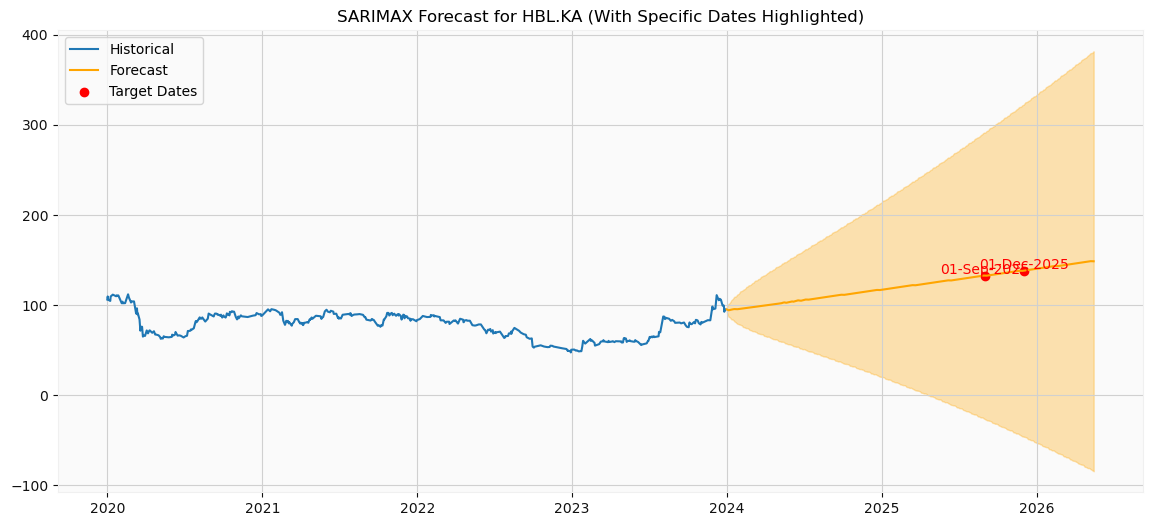

Forecast for specific dates:
Close_HBL.KA        mean  mean_ci_lower  mean_ci_upper
Date                                                  
2025-09-01    132.312380     -26.840102     291.464862
2025-12-01    138.116928     -46.256872     322.490728


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load data
hbl = yf.download('HBL.KA', start='2020-01-01', end='2024-01-01')
df_hbl = hbl[['Close']].dropna()

# 2. Fit SARIMAX model
model = SARIMAX(df_hbl, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# 3. Forecast enough steps to reach June 2026 (~620 business days from Jan 2024)
forecast_steps = 620
forecast = results.get_forecast(steps=forecast_steps)

# 4. Create forecast index and DataFrame
forecast_index = pd.date_range(start=df_hbl.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast_df = forecast.summary_frame()
forecast_df['Date'] = forecast_index
forecast_df.set_index('Date', inplace=True)

# 5. Get specific forecasted dates
specific_dates = ['2025-09-01', '2025-12-01', '2026-06-01']
specific_forecasts = forecast_df.loc[forecast_df.index.isin(pd.to_datetime(specific_dates))]

# 6. Plot entire forecast
plt.figure(figsize=(14, 6))
plt.plot(df_hbl.index, df_hbl['Close'], label='Historical')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='orange', alpha=0.3)
plt.scatter(specific_forecasts.index, specific_forecasts['mean'], color='red', label='Target Dates')
for date in specific_forecasts.index:
    plt.text(date, specific_forecasts.loc[date, 'mean'] + 2, date.strftime('%d-%b-%Y'), ha='center', color='red')
plt.title('SARIMAX Forecast for HBL.KA (With Specific Dates Highlighted)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Print specific forecast values
print("Forecast for specific dates:")
print(specific_forecasts[['mean', 'mean_ci_lower', 'mean_ci_upper']])
